<a href="https://colab.research.google.com/github/igorgomessilvaa/Mackenzie-BigData/blob/main/ParadigmasDaLinguagem_Trilha4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


Nome: Igor Silva 
Matricula:  992175120
###Ciência de Dados (Big Data Processing and Analytics)
Matéria: Paradigmas da linguagem. 

In [1]:
#Upload dos dados analisados
import pandas as pd
spread=pd.read_csv('https://raw.githubusercontent.com/igorgomessilvaa/Mackenzie-BigData/main/t4-fr_inr_lndp.csv')
captacao=pd.read_csv('https://raw.githubusercontent.com/igorgomessilvaa/Mackenzie-BigData/main/t4-fr_inr_dpst.csv')
emprestimo=pd.read_csv('https://raw.githubusercontent.com/igorgomessilvaa/Mackenzie-BigData/main/t4-fr_inr_lend.csv')

In [2]:
#Seleção e renomeação das colunas
spread2019=spread[['country','2019']] 
spread2019.rename(columns={'2019': 'Spread'}, inplace = True)
captacao2019=captacao[['country','2019']]
captacao2019.rename(columns={'2019': 'Captacao'}, inplace = True)
emprestimo2019=emprestimo[['country','2019']]
emprestimo2019.rename(columns={'2019': 'Emprestimo'}, inplace = True)

#Unificação dos dados selecionados em um único DataFrame e aplicação de 
#critérios de seleção de países participantes da análise.

df=pd.merge(spread2019,captacao2019)
df2=pd.merge(df,emprestimo2019).nlargest(10,'Emprestimo')
df2['Captacao']=df2['Captacao'].astype(float)
df2.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,Spread,Captacao,Emprestimo
76,Madagascar,35.7000,13.20,48.9
3,Argentina,0.0674,29.30,29.4
18,Brazil,26.8000,2.20,29.0
44,Gambia,21.2000,6.84,28.0
28,"Congo, Dem. Rep.",19.8000,6.20,26.0
110,Sierra Leone,17.8000,5.64,23.5
130,Uzbekistan,6.0300,16.30,22.3
1,Angola,13.5000,6.20,19.7
115,Sao Tome and Principe,15.9000,3.26,19.1
7,Azerbaijan,8.4900,8.69,17.2


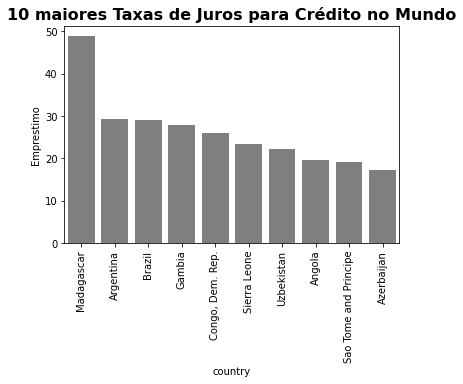

In [3]:
#Construção de Gráfico de barras para visualização dos Países com as Maiores 
#Taxas de Juros no Mundo

import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=df2.country, y=df2.Emprestimo, color='black', alpha=0.5)
plt.title('10 maiores Taxas de Juros para Crédito no Mundo',
          fontsize=16,weight='bold')
plt.xticks(rotation=90)
plt.show()

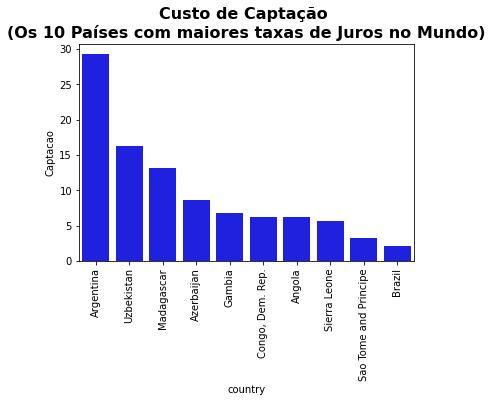

In [4]:
#Construção de gráfico de barras alterando o critério para Custo de Captação,
# em Ordem Decrescente

df3=df2.sort_values(by=['Captacao'], ascending=False)
sns.barplot(x=df3.country, y=df3.Captacao, color='Blue')
plt.title('Custo de Captação \n(Os 10 Países com maiores taxas de Juros no Mundo)',
          fontsize=16, weight='bold')
plt.xticks(rotation=90)
plt.show()

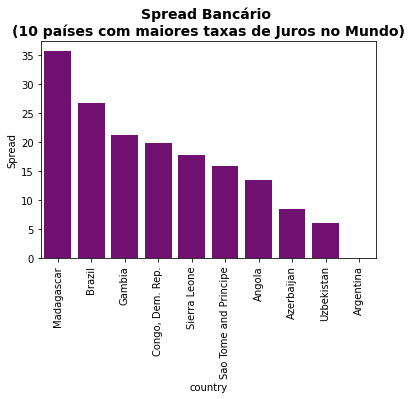

In [5]:
#Construção de gráfico de barras alterando o critério para Spread Bancário,
# em Ordem Decrescente
df4=df2.sort_values(by=['Spread'], ascending=False)
sns.barplot(x=df4.country, y=df4.Spread, color='purple')
plt.title('Spread Bancário \n(10 países com maiores taxas de Juros no Mundo)', 
          fontsize=14, weight='bold')
plt.xticks(rotation=90)
plt.show()

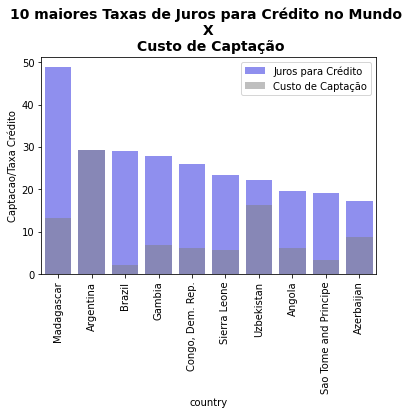

In [6]:
#Construção de Gráfico de Barras com a mescla das informações de Taxa e 
#Custo de captação.
sns.barplot(x=df2.country, y=df2.Emprestimo, color='blue', alpha=0.5,
            label='Juros para Crédito')
sns.barplot(x=df2.country, y=df2.Captacao, color='gray', alpha=0.5,
            label='Custo de Captação')
plt.title(
'10 maiores Taxas de Juros para Crédito no Mundo \n X \n Custo de Captação',
fontsize=14,weight='bold')
plt.ylabel('Captacao/Taxa Crédito')
plt.xticks(rotation=90)
plt.legend()
plt.show()
